In [1]:
import pandas as pd
import numpy as np
%matplotlib inline

In [2]:
import urllib
txt=urllib.request.urlopen(
    "http://growup.pw/index/TWsentiment.txt").read().decode('utf8')

records = txt.split('\r\n\r\n')
records = records[1:-1]
records = pd.Series(records)

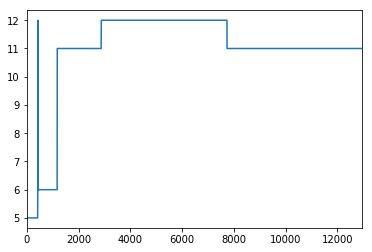

In [3]:
records.str.split('\r\n').map(len).plot();

In [4]:
records[0].split('\r\n')

['04/20/2018 19:10:58',
 'Long:162',
 'Short:92',
 'Price: 8485.1',
 'Отношение:1.76']

In [5]:
records[425].split('\r\n')

['05/09/2018 12:04:34',
 'Long:174',
 'Short:130',
 'Price:9037.8',
 'TA:Sell',
 'Отношение:1.33',
 '05/09/2018 13:07:44',
 'Long:178',
 'Short:134',
 'Price:9113.8',
 'TA:Neutral',
 'Отношение:1.32']

In [6]:
records = records.drop(425)

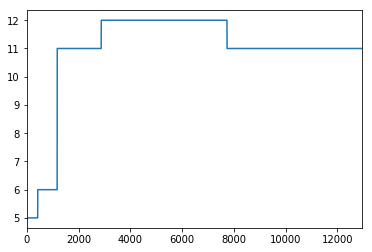

In [7]:
records.str.split('\r\n').map(len).plot();

In [8]:
records[1000].split('\r\n')

['05/21/2018 19:29:33',
 'Long:168',
 'Short:62',
 'Price:8389.7',
 'TA:Sell',
 'Отношение:2.70']

In [9]:
records[2000].split('\r\n')

['06/16/2018 21:58:50',
 'Price:6529.4',
 'TA:Sell',
 'Открытые позиции:',
 'Long:28268.6382 BTC',
 'Short:26164.1890 BTC',
 'Отношение:1.08',
 'Прогнозы трейдеров:',
 'Long:76',
 'Short:82',
 'Отношение:0.92']

In [10]:
records[4000]

'08/28/2018 09:34:56\r\nPrice:6901.9\r\nTA:Sell\r\nОткрытые позиции:\r\nLong:28597 BTC\r\nShort:33665 BTC\r\nОтношение:0.84\r\nИндекс страха: 19\r\nПрогнозы трейдеров:\r\nLong:106\r\nShort:66\r\nОтношение:1.60'

In [11]:
def mark_BTC_values(records):
    records = records.str.replace('BTC\r\nОтношение', 'BTC\r\nBTCОтношение')
    records =  records.str.replace('BTC\r\nShort', 'BTC\r\nBTCShort')
    records =  records.str.replace(
         'Открытые позиции:\r\nLong', 'Открытые позиции:\r\nBTCLong')
    return records

In [12]:
mark_BTC_values(records[4000:4001]).str.split('\r\n')[4001]

['08/28/2018 10:05:01',
 'Price:6904.0',
 'TA:Sell',
 'Открытые позиции:',
 'BTCLong:28590 BTC',
 'BTCShort:33661 BTC',
 'BTCОтношение:0.84',
 'Индекс страха: 19',
 'Прогнозы трейдеров:',
 'Long:108',
 'Short:64',
 'Отношение:1.68']

In [13]:
records = mark_BTC_values(records)

In [14]:
def record_to_series(rec):
    rec = rec.split('\r\n')
    d = dict([x.split(':') for x in rec[1:]])   
    d['time'] = rec[0]
    return pd.Series(d)
    

record_to_series(records[9000])

BTCLong                         32370 BTC
BTCShort                        26376 BTC
BTCОтношение                         1.22
Long                                   29
Price                              3451.1
Short                                  25
time                  02/08/2019 10:41:29
Индекс страха                          18
Открытые позиции                         
Отношение                            1.16
Прогнозы трейдеров                       
dtype: object

In [15]:
data = records.apply(record_to_series)

In [16]:
data.time = pd.to_datetime(data.time)
data = data.set_index('time')

In [17]:
data.describe()

,Long,Price,Short,Отношение,TA,BTCLong,Открытые позиции,Прогнозы трейдеров,BTCShort,BTCОтношение,Индекс страха
count,12943,12943,12943,12943,7317,11776,11776,11776,11729,11729,10074
unique,226,10154,172,389,5,8603,1,1,9240,132,68
top,53,,34,1,Sell,33076 BTC,,,24115 BTC,1.17,42
freq,204,32,301,143,3388,9,11776,11776,10,215,409


In [18]:
data.sample(1)

,Long,Price,Short,Отношение,TA,BTCLong,Открытые позиции,Прогнозы трейдеров,BTCShort,BTCОтношение,Индекс страха
time,,,,,,,,,,,
2018-05-22 08:59:17,118,8280.5,80,1.47,Sell,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
def preproces(data_):
    data = data_.copy()
    data = data.drop(['Открытые позиции', 'Прогнозы трейдеров'], axis=1)
    cols = ['Long','Price','Short','Отношение',
        'BTCLong', 'BTCShort','BTCОтношение','Индекс страха']

    data['BTCLong'] = data['BTCLong'].str.replace('BTC', '')
    data['BTCShort'] = data['BTCShort'].str.replace('BTC', '')

    for col in cols:
        data[col] = data[col].str.strip().replace('',None).astype(float)
        
        
    data = data.rename({'Отношение':'Ratio', 'BTCОтношение': 'BTCratio',
                       'Индекс страха':'Fearindex'}, axis=1)
    return data

In [20]:
a = preproces(data)

In [21]:
a['TA'].unique()

array([nan, 'Buy', 'Sell', 'Neutral', '', 'Strong Sell'], dtype=object)

In [22]:
a

,Long,Price,Short,Ratio,TA,BTCLong,BTCShort,BTCratio,Fearindex
time,,,,,,,,,
2018-04-20 19:10:58,162.0,8485.1,92.0,1.76,NaN,NaN,NaN,NaN,NaN
2018-04-20 20:00:35,166.0,8467.4,92.0,1.80,NaN,NaN,NaN,NaN,NaN
2018-04-20 21:00:24,166.0,8508.6,94.0,1.76,NaN,NaN,NaN,NaN,NaN
2018-04-20 22:00:41,172.0,8495.3,86.0,2.00,NaN,NaN,NaN,NaN,NaN
2018-04-20 23:00:39,170.0,8499.2,92.0,1.84,NaN,NaN,NaN,NaN,NaN
2018-04-21 00:00:00,172.0,8515.7,86.0,2.00,NaN,NaN,NaN,NaN,NaN
2018-04-21 01:00:32,158.0,8517.1,92.0,1.71,NaN,NaN,NaN,NaN,NaN
2018-04-21 02:00:33,164.0,8524.9,88.0,1.86,NaN,NaN,NaN,NaN,NaN
2018-04-21 03:00:21,166.0,8836.2,88.0,1.88,NaN,NaN,NaN,NaN,NaN
